# Logistic Regression

For classification problem, we usually start with Logistic Regression.

It is often sufficient and produce decent result.

We will compare it to our Threshold Predictor and see if it perform better.

For recap, the threshold predictor result :
```
Threshold Predictor 

Train Data Metrics:
F2 Score on Training Data: 0.7860593624973135
Recall on Training Data: 0.9062363163082587
Precision on Training Data: 0.6459185428659584
Accuracy on Training Data: 0.92275
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.8053615831757778
Recall on Test Data: 0.9280162842339008
Precision on Test Data: 0.6571438277056866
Accuracy on Test Data: 0.9275
```

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']
y_train_over_omf = pd.read_csv('y_oversample_train.csv')
X_train_over_omf = pd.read_csv('X_oversample_train.csv')

X_train_reduced = X_train.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
X_test_reduced = X_test.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
X_train_over_reduced = X_train_over_omf.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
print("Oversampling done. Shape of oversampled training set:", X_train_over_omf.shape)
print("Oversampling done. Shape of oversampled training labels:", y_train_over_omf.shape)

Oversampling done. Shape of oversampled training set: (15444, 9)
Oversampling done. Shape of oversampled training labels: (15444, 1)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    y_train_omf = y_train['Machine failure']
    y_test_omf = y_test['Machine failure']
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2, average='macro')
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2, average='macro')
    train_recall=recall_score(y_train_omf, y_train_pred_omf, average='macro')
    test_recall=recall_score(y_test_omf, y_test_pred_omf, average='macro')
    train_precision=precision_score(y_train_omf, y_train_pred_omf, average='macro', zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf, average='macro', zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__


    plt.figure(figsize=(15, 5))
    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 1))
    plt.title(f'{predictor_name} on Train Data')
    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
    plt.title(f'{predictor_name} on Test Data')
    plt.show()


    print(predictor_name)
    print(" For `Machine failure` label:")
    print("--------------------------------------------------")
    print("Train Data Metrics:")
    print(f"F2 Score on Training Data: {f2_train}")
    print(f"Recall on Training Data: {train_recall}")
    print(f"Precision on Training Data: {train_precision}")
    print(f"Accuracy on Training Data: {train_accuracy}")
    print("--------------------------------------------------")
    print("Test Data Metrics:")
    print(f"F2 Score on Test Data: {f2_test}")
    print(f"Recall on Test Data: {test_recall}")
    print(f"Precision on Test Data: {test_precision}")
    print(f"Accuracy on Test Data: {test_accuracy}")


## Logistic Regression On Imbalanced Data

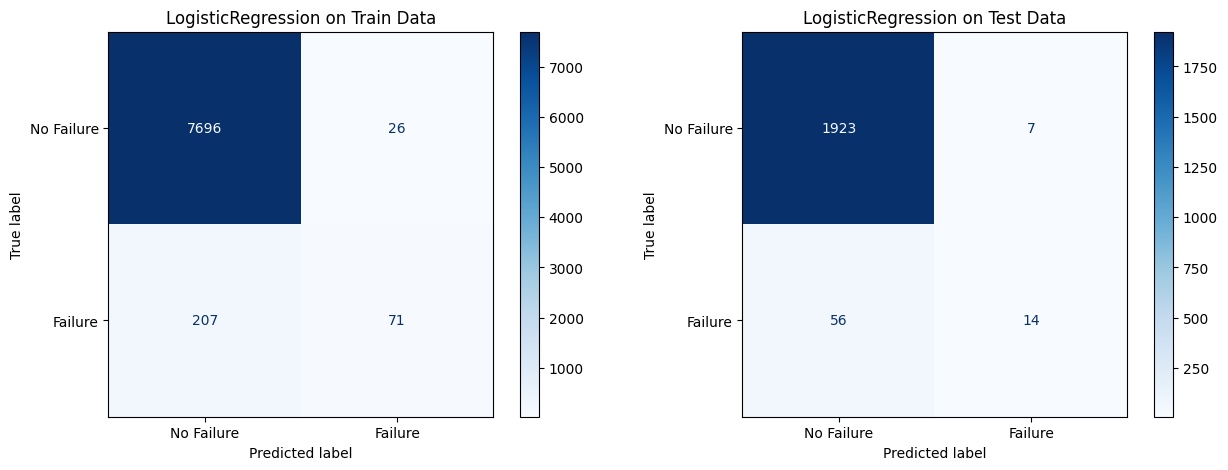

LogisticRegression
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.642806888238361
Recall on Training Data: 0.6260143400431171
Precision on Training Data: 0.8528830888961649
Accuracy on Training Data: 0.970875
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.6119487264330775
Recall on Test Data: 0.5981865284974094
Precision on Test Data: 0.8191847734546067
Accuracy on Test Data: 0.9685


In [29]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.7860593624973135
- F2 Score on Test Data: 0.8053615831757778
- Accuracy on Training Data: 0.92275
- Accuracy on Test Data: 0.9275

LogisticRegression:
- F2 Score on Training Data: 0.642806888238361
- F2 Score on Test Data: 0.6119487264330775
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

In term of accuracy our logistic regression is much more accurate than Threshold Predictor but its F2 scores are worst

This could be due to imbalanced dataset that we discovered during our preprocessing stage

## Logistic Regression on Balanced Data


Let's see if using balanced dataset will improved our F2 and accuracy

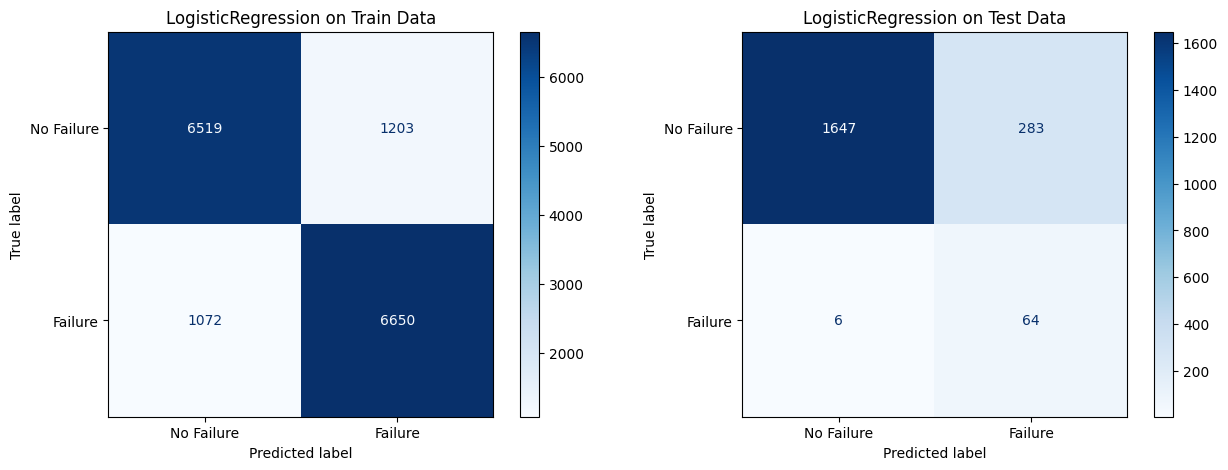

LogisticRegression
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.8526746390243292
Recall on Training Data: 0.8526936026936027
Precision on Training Data: 0.8527951353116546
Accuracy on Training Data: 0.8526936026936027
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.6944771290708951
Recall on Test Data: 0.8838267949666914
Precision on Test Data: 0.5904041381402427
Accuracy on Test Data: 0.8555


In [30]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train_over_omf, y_train=y_train_over_omf, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.7860593624973135
- F2 Score on Test Data: 0.8053615831757778
- Accuracy on Training Data: 0.92275
- Accuracy on Test Data: 0.9275

LogisticRegression:
- F2 Score on Training Data: 0.642806888238361
- F2 Score on Test Data: 0.6119487264330775
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

LogisticRegression on balanced dataset
- F2 Score on Training Data: 0.8526746390243292
- F2 Score on Test Data: 0.6944771290708951
- Accuracy on Training Data: 0.8526936026936027
- Accuracy on Test Data: 0.8555

Using balanced dataset where we have more failure data, actually reduce our accuracy but it is expected as we have less bias toward majority class (non-fail).

Our F2 scores have improved. However, it is still worse than Threshold Predictor on test data although it is better in training data.

## Logistic Regression on Reduced Features


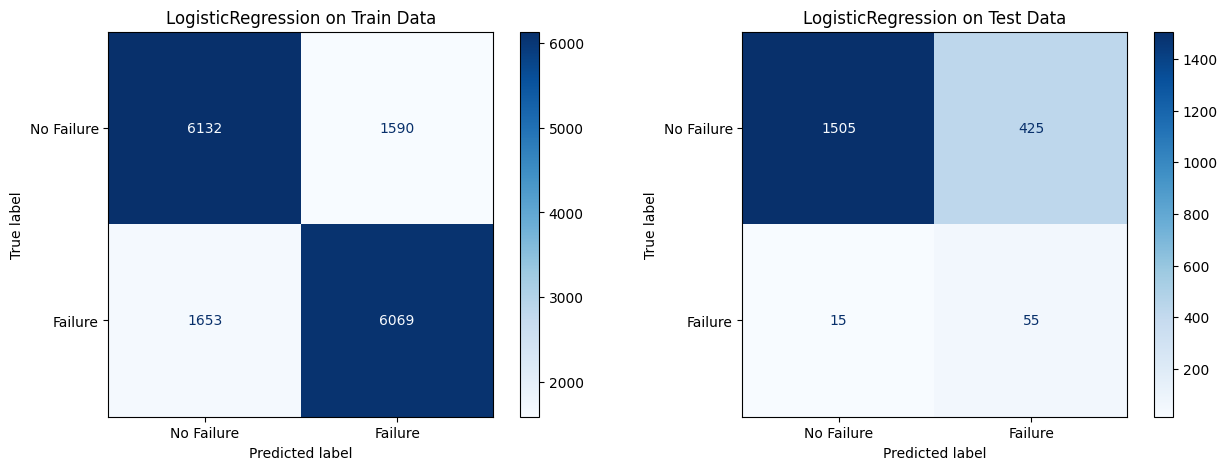

LogisticRegression
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.7900109872549256
Recall on Training Data: 0.79001554001554
Precision on Training Data: 0.7900348450989315
Accuracy on Training Data: 0.79001554001554
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.5881180223285487
Recall on Test Data: 0.7827535159141377
Precision on Test Data: 0.5523574561403509
Accuracy on Test Data: 0.78


In [33]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train_over_reduced, y_train=y_train_over_omf, X_test=X_test_reduced, y_test=y_test)

Reducing the features produce much worse performance from our logistic regression.



# Hypothesis